
## __Alternus Vera__

*Course code : CMPE-257*

Group name : Shecodes

**Name: Swati Ganesh Narkhede (014526915)**

GitHub URL: 

Liar Liar Pants on Fire Dataset Description
It has 3 files test, training and valid.
Each file has 14 columns

Column 1: the ID of the statement ([ID].json).

Column 2: the label.

Column 3: the statement.

Column 4: the subject(s).

Column 5: the speaker.

Column 6: the speaker's job title.

Column 7: the state info.

Column 8: the party affiliation.

Column 9-13: the total credit history count, including the current statement.

Column 14: the context (venue / location of the speech or statement).

**Process of My Approach**

1. Load the Data
2. Distillation Process
  i. Named Entity Recognition (NER)
  ii. Doc2Vec
  iii. LDA
3. Data Cleaning and Text Preprocessing
4. Visualization
5. Writing Style Feature Implementation
6. Vector Classification Modeling
7. Ranking and Importance

**Feature Selection:** 
1. Sentiment Polarity Analysis
2. Click Bait
3. Topic Modelling and LDA

**Enrichment Dataset Details**
1. SenticNet5 sensational words corpus 
2. Google News 3million words corpus for spell check 
3. Sensational Words Dictionary 
4. PoliticalFact Fake news and Real News Content 
5. Clickbait and non_clickbait datasets 
6. Spam Dictionary
7. Kaggle Fake News Dataset

**Libraries Used**

1. NLTK
2. Gensim
3. Numpy
4. Pandas
5. CSV
6. WordCloud
7. Seaborn
8. Scipy
9. Regualr Expression
10. Matplotlib
11. Sklearn
12. Gensim
13. xgboost



**What did I try and What worked?**

Writing style of any article can tell us alot about the authors and their motives. We can determine whether the content is True or False. 
We can identify fakeness of any article by examining the Sentiments generated by the sentence. Usually, a fake content contains strong sentiments. True article has neutral tone. 
To identify the fakeness of any article we can examine the gramatical mistakes, Writing quality and professionalism of the article.

**What did not work?**

I have tried adding LDA2Vec and Doc2Vec to add scores in dataframe but it did not work.

**What alternatives did you try?**

I have tried using Transformer and Lexical Ambiguity (Syntactical Ambiguity)

# Data Loading and Pre Processing

In [0]:
import pandas as pd
import numpy as np
import csv
import re
import seaborn as sns
from google.colab import drive
import gensim
from scipy.spatial.distance import cosine
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from nltk.stem.wordnet import WordNetLemmatizer
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from nltk.stem.porter import PorterStemmer
from sklearn import metrics
from gensim.models.word2vec import Word2Vec
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.pipeline import Pipeline
from nltk.corpus import stopwords
from string import punctuation
import nltk
from xgboost import XGBClassifier
from xgboost import plot_importance
from matplotlib import pyplot
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
import matplotlib.pyplot as plt
from scipy import sparse
from gensim.models.doc2vec import TaggedDocument


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.6/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


Load the dataset

In [0]:
drive.mount('/content/drive')
# Load Fake News dataset from Kaggle
fake_train = pd.read_csv("/content/drive/Shared drives/SheCodes/Datasets/fakenews/train_fakenews.csv",sep=',')
fake_test = pd.read_csv("/content/drive/Shared drives/SheCodes/Datasets/fakenews/test_fakenews.csv",sep=',')
fake_submit = pd.read_csv("/content/drive/Shared drives/SheCodes/Datasets/fakenews/submit_fakenews.csv",sep=',')
fake_test = pd.merge(fake_test, fake_submit, on="id", how='left')
fake_train.head()


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [0]:
fake_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20800 entries, 0 to 20799
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      20800 non-null  int64 
 1   title   20242 non-null  object
 2   author  18843 non-null  object
 3   text    20761 non-null  object
 4   label   20800 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 812.6+ KB


In [0]:
fake_test.head()


,id,title,author,text,label
0,20800,"Specter of Trump Loosens Tongues, if Not Purse...",David Streitfeld,"PALO ALTO, Calif. — After years of scorning...",0
1,20801,Russian warships ready to strike terrorists ne...,NaN,Russian warships ready to strike terrorists ne...,1
2,20802,#NoDAPL: Native American Leaders Vow to Stay A...,Common Dreams,Videos #NoDAPL: Native American Leaders Vow to...,0
3,20803,"Tim Tebow Will Attempt Another Comeback, This ...",Daniel Victor,"If at first you don’t succeed, try a different...",1
4,20804,Keiser Report: Meme Wars (E995),Truth Broadcast Network,42 mins ago 1 Views 0 Comments 0 Likes 'For th...,1


In [0]:
fake_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5200 entries, 0 to 5199
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      5200 non-null   int64 
 1   title   5078 non-null   object
 2   author  4697 non-null   object
 3   text    5193 non-null   object
 4   label   5200 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 243.8+ KB


In [0]:
# Pick only title and text columns from Kaggle dataset
fake_train = fake_train[['title', 'text', 'label']]
fake_test = fake_test[['title','text','label']]
print(fake_train.shape)
print(fake_test.shape)

(20800, 3)
(5200, 3)


In [0]:
# Load Liar-Liar dataset
columns = [
  'jsonid', 
  'label', 
  'text', 
  'subject', 
  'speaker', 
  'speakerjobtitle', 
  'stateinfo',
  'partyaffiliation', 
  'barelytruecounts', 
  'falsecounts',
  'halftruecounts',
  'mostlytrueocunts',
  'pantsonfirecounts',
  'context'
  ]
liar_train = pd.read_csv("/content/drive/Shared drives/SheCodes/Datasets/liar_dataset/train.tsv",sep='\t', names=columns)
liar_test = pd.read_csv("/content/drive/Shared drives/SheCodes/Datasets/liar_dataset/test.tsv",sep='\t', names=columns)
liar_valid = pd.read_csv("/content/drive/Shared drives/SheCodes/Datasets/liar_dataset/valid.tsv",sep='\t', names=columns)

In [0]:
liar_train.head()

,jsonid,label,text,subject,speaker,speakerjobtitle,stateinfo,partyaffiliation,barelytruecounts,falsecounts,halftruecounts,mostlytrueocunts,pantsonfirecounts,context
0,2635.json,false,Says the Annies List political group supports ...,abortion,dwayne-bohac,State representative,Texas,republican,0.0,1.0,0.0,0.0,0.0,a mailer
1,10540.json,half-true,When did the decline of coal start? It started...,"energy,history,job-accomplishments",scott-surovell,State delegate,Virginia,democrat,0.0,0.0,1.0,1.0,0.0,a floor speech.
2,324.json,mostly-true,"Hillary Clinton agrees with John McCain ""by vo...",foreign-policy,barack-obama,President,Illinois,democrat,70.0,71.0,160.0,163.0,9.0,Denver
3,1123.json,false,Health care reform legislation is likely to ma...,health-care,blog-posting,NaN,NaN,none,7.0,19.0,3.0,5.0,44.0,a news release
4,9028.json,half-true,The economic turnaround started at the end of ...,"economy,jobs",charlie-crist,NaN,Florida,democrat,15.0,9.0,20.0,19.0,2.0,an interview on CNN


In [0]:
liar_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10240 entries, 0 to 10239
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   jsonid             10240 non-null  object 
 1   label              10240 non-null  object 
 2   text               10240 non-null  object 
 3   subject            10238 non-null  object 
 4   speaker            10238 non-null  object 
 5   speakerjobtitle    7343 non-null   object 
 6   stateinfo          8032 non-null   object 
 7   partyaffiliation   10238 non-null  object 
 8   barelytruecounts   10238 non-null  float64
 9   falsecounts        10238 non-null  float64
 10  halftruecounts     10238 non-null  float64
 11  mostlytrueocunts   10238 non-null  float64
 12  pantsonfirecounts  10238 non-null  float64
 13  context            10138 non-null  object 
dtypes: float64(5), object(9)
memory usage: 1.1+ MB


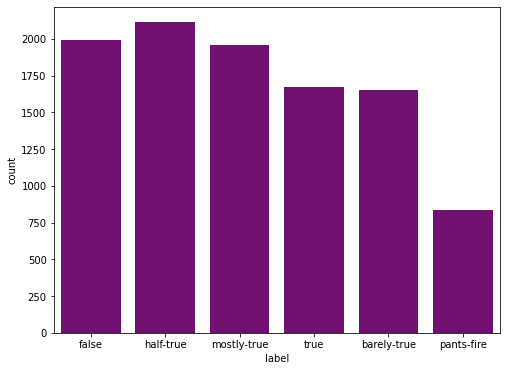

In [0]:
plt.figure(figsize=(8,6))
p=sns.countplot(liar_train["label"], color='purple')

We can see that in liar train dataset, half true news are more as compared to other category of news.

For a better classification; we combine the labels in the following way:

* "False", "half-true", "barely-true", "pants-fire" as lies i.e. class 0
* "True" & "mostly-true" as truth i.e. class 1

In [0]:
cat_to_nums = {"label":     {"true":1, "false":0, "barely-true": 0, "half-true": 0, "mostly-true": 1,"pants-fire": 0} }
liar_train.replace(cat_to_nums, inplace=True)
liar_train['label']


cat_to_nums = {"label":     {"true":1, "false":0, "barely-true": 0, "half-true": 0, "mostly-true": 1,"pants-fire": 0} }
liar_test.replace(cat_to_nums, inplace=True)
liar_test['label']

0       1
1       0
2       0
3       0
4       0
       ..
1262    0
1263    0
1264    0
1265    0
1266    0
Name: label, Length: 1267, dtype: int64

19

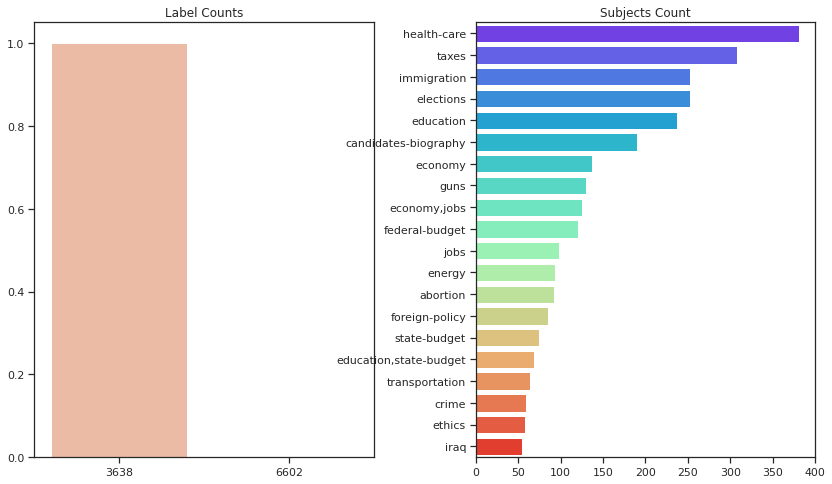

In [0]:
import gc
import matplotlib.pyplot as matplot_plt
import seaborn as seaborn_lib; seaborn_lib.set(style="ticks", color_codes=True)
f,ax = matplot_plt.subplots(1,2, figsize=(14,8))
ax1,ax2, = ax.flatten()
cnt = liar_train['label'].value_counts()[:20].to_frame()

seaborn_lib.barplot(cnt['label'], cnt.index, palette = 'RdBu', ax =ax1)
ax1.set_xlabel('')
ax1.set_title('Label Counts')

cnt = liar_train['subject'].value_counts()[:20].to_frame()

seaborn_lib.barplot(cnt['subject'], cnt.index, palette = 'rainbow', ax =ax2)
ax2.set_xlabel('')
ax2.set_title('Subjects Count')
matplot_plt.subplots_adjust(wspace=0.3)
gc.collect()

In [0]:
# Drop unwanted features from liar liar train dataset
liar_train_new = liar_train.drop(['jsonid','subject','speaker', 'speakerjobtitle','stateinfo','partyaffiliation',
 'context'], axis = 1)

In [0]:
liar_train_new.head()

,label,text,barelytruecounts,falsecounts,halftruecounts,mostlytrueocunts,pantsonfirecounts
0,0,Says the Annies List political group supports ...,0.0,1.0,0.0,0.0,0.0
1,0,When did the decline of coal start? It started...,0.0,0.0,1.0,1.0,0.0
2,1,"Hillary Clinton agrees with John McCain ""by vo...",70.0,71.0,160.0,163.0,9.0
3,0,Health care reform legislation is likely to ma...,7.0,19.0,3.0,5.0,44.0
4,0,The economic turnaround started at the end of ...,15.0,9.0,20.0,19.0,2.0


*Checking the Feature importance*

In [0]:
#retaining the historical features after plotting their feature importance using giniindex
liar_gini = liar_train_new.drop(['text'], axis = 1)

In [0]:
Y = liar_gini['label']
x = liar_gini.drop(['label'], axis=1, inplace=True)

In [0]:
xgb_model = XGBClassifier()
xgb_model.fit(liar_gini, Y)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

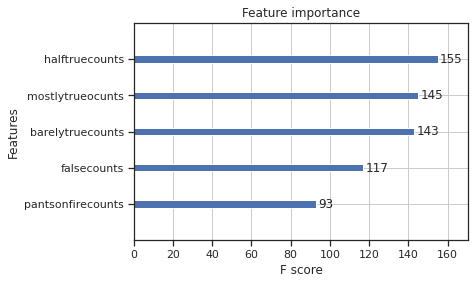

In [0]:
plot_importance(xgb_model)
pyplot.show()

In above result, we can see that features halftruecounts, mostlytruecounts, barely truecounts, falsecounts and pantsonfirecounts are important. Hence, we will consider these features.

In [0]:
liar_train_new

,label,text,barelytruecounts,falsecounts,halftruecounts,mostlytrueocunts,pantsonfirecounts
0,0,Says the Annies List political group supports ...,0.0,1.0,0.0,0.0,0.0
1,0,When did the decline of coal start? It started...,0.0,0.0,1.0,1.0,0.0
2,1,"Hillary Clinton agrees with John McCain ""by vo...",70.0,71.0,160.0,163.0,9.0
3,0,Health care reform legislation is likely to ma...,7.0,19.0,3.0,5.0,44.0
4,0,The economic turnaround started at the end of ...,15.0,9.0,20.0,19.0,2.0
...,...,...,...,...,...,...,...
10235,1,There are a larger number of shark attacks in ...,0.0,1.0,1.0,1.0,0.0
10236,1,Democrats have now become the party of the [At...,0.0,0.0,0.0,1.0,0.0
10237,0,Says an alternative to Social Security that op...,4.0,11.0,5.0,3.0,3.0
10238,0,On lifting the U.S. Cuban embargo and allowing...,3.0,1.0,3.0,0.0,0.0


In [0]:
# Drop unwanted features from liar liar test dataset
liar_test_new = liar_test.drop(['jsonid','subject','speaker', 'speakerjobtitle','stateinfo','partyaffiliation','context'], axis = 1)
liar_test_new.head()

,label,text,barelytruecounts,falsecounts,halftruecounts,mostlytrueocunts,pantsonfirecounts
0,1,Building a wall on the U.S.-Mexico border will...,30,30,42,23,18
1,0,Wisconsin is on pace to double the number of l...,2,1,0,0,0
2,0,Says John McCain has done nothing to help the ...,63,114,51,37,61
3,0,Suzanne Bonamici supports a plan that will cut...,1,1,3,1,1
4,0,When asked by a reporter whether hes at the ce...,5,7,2,2,7


In [0]:
# Merging Kaggle Fake news dataset and Liar Liar dataset
merged_train_data = pd.concat([fake_train, liar_train_new])
merged_test_data = pd.concat([fake_test, liar_test_new])

In [0]:
# Load Politifact news dataset
politifact_fake = pd.read_csv("/content/drive/Shared drives/SheCodes/Datasets/politifact_dataset/Fake.csv",sep=',')
politifact_fake['label'] = 1
politifact_true = pd.read_csv("/content/drive/Shared drives/SheCodes/Datasets/politifact_dataset/True.csv",sep=',')
politifact_true['label'] = 0
df_politifact = pd.concat([politifact_fake, politifact_true])
df_politifact.head()

,title,text,subject,date,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",1
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",1
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",1
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",1
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",1


In [0]:
df_politifact_new = df_politifact[['title', 'text', 'label']]

In [0]:
df_train_final = pd.concat([merged_train_data, df_politifact_new])
df_test_final = merged_test_data.copy()
df_train_final = df_train_final.sample(frac=1).reset_index(drop=True)
df_test_final = df_train_final.sample(frac=1).reset_index(drop=True)
df_train_final.head()

,title,text,label,barelytruecounts,falsecounts,halftruecounts,mostlytrueocunts,pantsonfirecounts
0,NaN,"Gov. Lawton Chiles said ""if I were to become ....",1,0.0,0.0,0.0,1.0,0.0
1,Trump Quietly Continues Obama’s ’Catch and Rel...,President Donald J. Trump is allowing former P...,0,NaN,NaN,NaN,NaN,NaN
2,Rich Couple’s INSANE Explanation For Why They...,We know that Donald Trump appeals to what he c...,1,NaN,NaN,NaN,NaN,NaN
3,NaN,are u dumb,1,NaN,NaN,NaN,NaN,NaN
4,Thanks Obama! The 99 Percent Are Doing Better...,The very cornerstone of Bernie Sanders campai...,1,NaN,NaN,NaN,NaN,NaN


In [0]:
df_train_final = df_train_final.fillna(0)
df_test_final = df_test_final.fillna(0)

In [0]:
df_train_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75938 entries, 0 to 75937
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   title              75938 non-null  object 
 1   text               75938 non-null  object 
 2   label              75938 non-null  int64  
 3   barelytruecounts   75938 non-null  float64
 4   falsecounts        75938 non-null  float64
 5   halftruecounts     75938 non-null  float64
 6   mostlytrueocunts   75938 non-null  float64
 7   pantsonfirecounts  75938 non-null  float64
dtypes: float64(5), int64(1), object(2)
memory usage: 4.6+ MB


# Text Cleaning

In this section, we are going to clean the tile and text string by performing the following text cleaning operations
* Lower case text
* Remove special characters
* Tokenize text into words using nltk
* Remove stop Words
* Lemmatization and Stemming

In [0]:
import re
import time
import nltk
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.stem import SnowballStemmer
from nltk.corpus import stopwords
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt')

# Remove this line when you want to run this for complete dataset
df_train_final = df_train_final.truncate(after=10000)
df_train_final = df_train_final.truncate(after=10000)

def text_cleaning(text):
  lemmatizer = WordNetLemmatizer()
  #clean_text = re.sub("[^a-zA-Z]", " ", text)
  clean_text = re.sub("[^a-zA-Z]", " ",str(text))
  lowered_text = clean_text.lower()
  words = nltk.word_tokenize(lowered_text)
  # All stop words
  stop_words = set(nltk.corpus.stopwords.words("english"))
  filtered_words = [word for word in  words  if not word in stop_words]
  lemm_words = [lemmatizer.lemmatize(word) for word in filtered_words]
  stems = [SnowballStemmer('english').stem(word) for word in lemm_words]
  return " ".join(stems)

t1 = time.time()
df_train_final["text"] = df_train_final["text"].apply(text_cleaning)
t2 = time.time()
print("Time take for text cleaning with length: {} is {} mins".format(len(df_train_final), (t2-t1)/60))
df_train_final.head()

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
Time take for text cleaning with length: 10001 is 1.16123761733373 mins


,title,text,label,barelytruecounts,falsecounts,halftruecounts,mostlytrueocunts,pantsonfirecounts
0,0,gov lawton chile said becom becom speaker hous...,1,0.0,0.0,0.0,1.0,0.0
1,Trump Quietly Continues Obama’s ’Catch and Rel...,presid donald j trump allow former presid bara...,0,0.0,0.0,0.0,0.0,0.0
2,Rich Couple’s INSANE Explanation For Why They...,know donald trump appeal call poor educ take l...,1,0.0,0.0,0.0,0.0,0.0
3,0,u dumb,1,0.0,0.0,0.0,0.0,0.0
4,Thanks Obama! The 99 Percent Are Doing Better...,cornerston berni sander campaign incom inequ g...,1,0.0,0.0,0.0,0.0,0.0


In [0]:
t1 = time.time()

df_test_final["text"] = df_test_final["text"].apply(text_cleaning)
t2 = time.time()
print("Time take for text cleaning with length: {} is {} mins".format(len(df_test_final), (t2-t1)/60))
df_test_final.head()

Time take for text cleaning with length: 75938 is 8.649804127216338 mins


,title,text,label,barelytruecounts,falsecounts,halftruecounts,mostlytrueocunts,pantsonfirecounts
0,Abe aims to underscore importance of Japan-U.S...,tokyo reuter japanes prime minist shinzo abe a...,0,0.0,0.0,0.0,0.0,0.0
1,KARMA! Did Meryl Streep’s Anti-Trump Rant At G...,karma seem bite lot anti trump lib pretti hard...,1,0.0,0.0,0.0,0.0,0.0
2,"Obama, Mexico's Pena Nieto discuss U.S.-Mexico...",washington reuter presid barack obama spoke ph...,0,0.0,0.0,0.0,0.0,0.0
3,BUMBLING BILL CLINTON Manages To Insult Poland...,clinton campaign manag commit biggest blunder ...,1,0.0,0.0,0.0,0.0,0.0
4,0,hous republican appropri bill million senior d...,0,3.0,7.0,11.0,2.0,3.0


# Visualizations


**Word clouds**

In [0]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

def plot_wordcloud(data,backgroundcolor = 'white', width = 800, height = 600):
    wordcloud = WordCloud(stopwords = STOPWORDS, background_color = backgroundcolor,
                         width = width, height = height).generate(data)
    plt.figure(figsize = (15, 10))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()
    

**plotting word cloud for titles**

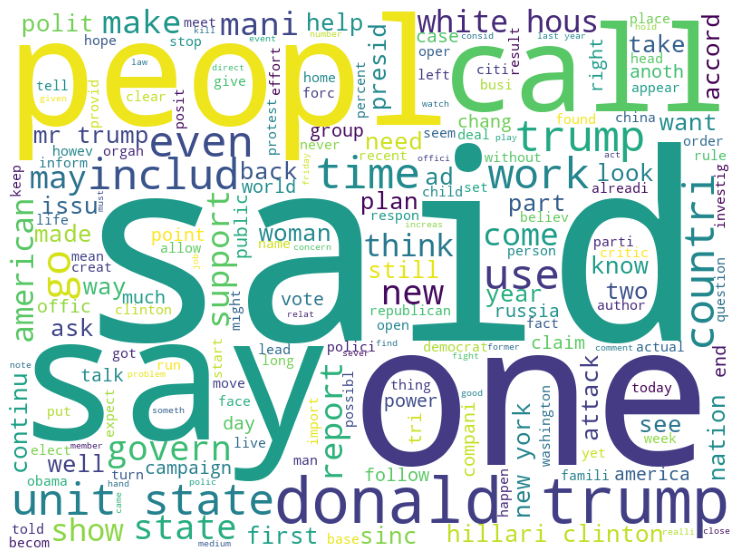

In [0]:
plot_wordcloud(' '.join(df_train_final['text']))

**plotting word cloud for text**

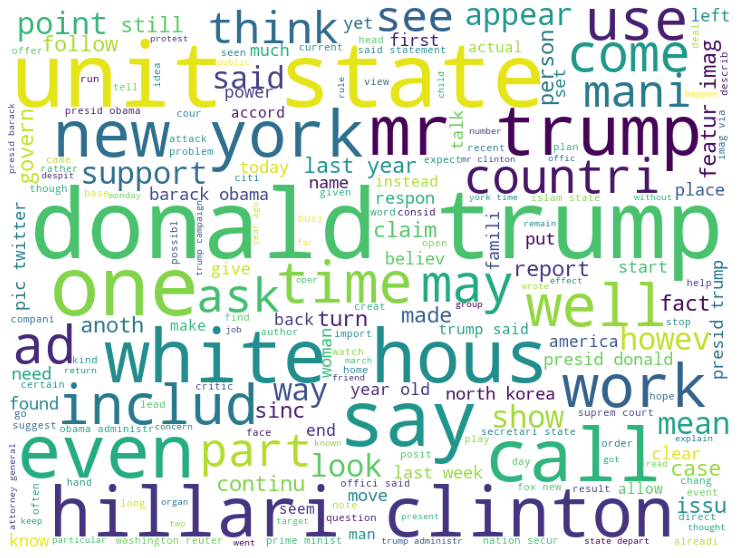

In [0]:
plot_wordcloud(' '.join(df_test_final['text']))

#Distillation technique

1. Named Entity Recognition (NER)

In [0]:

#!pip install spacy 
import spacy  
nlp = spacy.load('en_core_web_sm') 
for n in df_train_final['text']:
  doc = nlp(n) 
  for ent in doc.ents: 
    print("Text : {}   Label: {}".format(ent.text, ent.label_) )

Streaming output truncated to the last 5000 lines.
Text : washington   Label: GPE
Text : compani amaz   Label: PERSON
Text : sean gunn play kirk   Label: PERSON
Text : one   Label: CARDINAL
Text : saturday   Label: DATE
Text : nine year ago   Label: DATE
Text : next month   Label: DATE
Text : gunn   Label: PERSON
Text : busi manicur   Label: PERSON
Text : christian   Label: NORP
Text : jewish   Label: NORP
Text : quirki   Label: GPE
Text : ami videograph   Label: PERSON
Text : bay area   Label: LOC
Text : week two year ago   Label: DATE
Text : connecticut   Label: GPE
Text : washington   Label: GPE
Text : quest chronicl blog   Label: PERSON
Text : burger   Label: ORG
Text : star hollow alway   Label: FAC
Text : extra vanessa marano   Label: PERSON
Text : qualiti star hollow whenev   Label: ORG
Text : warner   Label: ORG
Text : m marano   Label: PERSON
Text : washington depot   Label: ORG
Text : jenni whitak   Label: ORG
Text : marcus fan seri   Label: PERSON
Text : austin tex   Label: 

2. Doc2Vec

In [0]:
# Doc2Vec
from gensim.test.utils import common_texts
from gensim.models.doc2vec import Doc2Vec, TaggedDocument

documents = [TaggedDocument(doc, [i]) for i, doc in enumerate(common_texts)]
d2v_model = Doc2Vec(documents, vector_size=5, window=2, min_count=1, workers=4)

words = []
for i in range(0,len(documents)):
  words.append(documents[i][0])
for lst in words:
  for w in lst:
    print(d2v_model.infer_vector(w))

   

[ 0.02018417 -0.04895855  0.00252677  0.09135611  0.07827955]
[0.04236517 0.04921035 0.03013219 0.01088398 0.02799825]
[-0.07862905 -0.07917245 -0.05576058  0.0991895   0.0983068 ]
[ 0.00364268  0.01784056 -0.09636617 -0.02590682 -0.06325293]
[-0.00090388  0.00038441 -0.00855985  0.02524928 -0.02251487]
[-0.07862905 -0.07917245 -0.05576058  0.0991895   0.0983068 ]
[-0.05552446  0.07469975 -0.05744845  0.01684689  0.05486967]
[0.00401341 0.03775159 0.08541434 0.03230176 0.08655345]
[-0.04956824  0.02525142 -0.03252666  0.03819182  0.05944298]
[-0.05847653  0.04096817  0.01619469 -0.08098251  0.0139229 ]
[-0.00090388  0.00038441 -0.00855985  0.02524928 -0.02251487]
[0.04236517 0.04921035 0.03013219 0.01088398 0.02799825]
[-0.05552446  0.07469975 -0.05744845  0.01684689  0.05486967]
[-0.05552446  0.07469975 -0.05744845  0.01684689  0.05486967]
[ 0.02018417 -0.04895855  0.00252677  0.09135611  0.07827955]
[-0.05552446  0.07469975 -0.05744845  0.01684689  0.05486967]
[-0.05847653  0.0409681

# Writing Style factor implementation

1. Click Bait:  

Checking Writing quality by identifying the unprofessional words used in content. In informal conversation, we usually contract the words in content. Hence, here we will take count of contracted words. A writing style of a fake news is ambiguous.

In [0]:
# To check if the writing style is formal or not we will use word contraction list and count the casual words used in text



question_words = [ 'can', 'cant', 'could', 'will', 'would','who', 'whos', 'whose', 'what',
                  'whats', 'whatre', 'when', 'whenre', 'whens', 'couldnt','howd', 'this', 'are', 'arent',
                  'where', 'wheres', 'whered', 'why', 'whys', 'is','youre', 'youll', 'youd', 'here', 'heres',
                  'isnt', 'should','how', 'hows',  'which', 'does', 'doesnt', 'shouldnt', 'you', 'your']  

word_contractions_list = ['tis', 'aint', 'amnt', 'arent', 'cant', 'couldve', 'couldnt', 'couldntve',
                    'didnt', 'doesnt', 'dont', 'gonna', 'thatll', 'thats', 'thatd', 'thered',
                    'havent', 'hed', 'hednt', 'hedve', 'hell', 'hes', 'hesnt', 'howd', 'howll',
                    'hows', 'id', 'idnt', 'idntve','theyre', 'theyve', 'theyvent', 'wasnt', 
                    'itd', 'itdnt', 'itdntve', 'itdve', 'itll', 'its', 'itsnt', 'mightnt',
                    'mightve', 'mustnt', 'mustntve','youre', 'yourent', 'youve', 
                    'shant', 'shed', 'shednt', 'shedntve', 'shedve', 'shell', 'shes', 'shouldve',
                    'shouldnt', 'shouldntve','wouldve', 'wouldnt', 'wouldntve',
                    'someoned', 'someonednt', 'someonedntve', 'someonedve', 'someonell', 'someones',
                    'somethingd', 'somethingdnt', 'somethingdntve', 'somethingdve', 'somethingll',
                    'somethings', 'therednt', 'theredntve', 'gotta', 'hadnt', 'hadntve', 'hasnt',
                    'theredve', 'therere', 'theres', 'theyd', 'theydnt', 'theydntve', 'theydve',
                    'theydvent', 'theyll', 'theyontve', 'idve', 'ill', 'im', 'ive', 'ivent', 'isnt',
                    'wed', 'wedve', 'wednt', 'wedntve', 'well', 'wontve', 'were', 'weve', 'werent',
                    'whatd', 'whatll', 'whatre', 'whats', 'whatve', 'whens', 'whered', 'wheres',
                    'whereve', 'whod', 'whodve', 'wholl', 'whore', 'whos', 'whove', 'whyd', 'whyre',
                    'whys', 'wont', 'wontve',  'yall', 'yalldve', 'somebodydve', 'somebodydntve', 'somebodys',
                    'yalldntve', 'yallll', 'yallont', 'yallllve', 'yallre', 'yallllvent', 'yaint',
                    'youd', 'youdve', 'youll',  'youvent','mustve', 'neednt', 'oclock', 'ol', 'oughtnt',]

stop_Word_list = set(nltk.corpus.stopwords.words("english"))
  
    
def stop_words(text):
        t = text.split()
        num = len([word for word in t if word in stop_Word_list])
        return num

def num_contraction(text):
    spl = text.split()
    num = len([word for word in spl if word in word_contractions_list])
    return num

def total_stop_words(text):
        t = text.split()
        num = len([word for word in t if word in stop_Word_list])
        return num

def part_of_speech(text):
        t = text.split()
        nonstop = [word for word in t if word not in stop_Word_list]
        pos = [part[1] for part in nltk.pos_tag(nonstop)]
        pos = ' '.join(pos)
        return pos

In [0]:
df_train_final['num_contraction'] = df_train_final['text'].apply(num_contraction)
df_train_final['total_stop_words'] = df_train_final['text'].apply(total_stop_words)
df_train_final['stop_words'] = df_train_final['text'].apply(stop_words)
df_train_final['pos'] = df_train_final['text'].apply(part_of_speech)

2. *Sentiment Polarity Analysis*

The sentiments of a Fake news content are highly polarized. Either they are highly positive or highly negative. True news contents generate neutral sentiments. Hence, we will check Sentiment Polarity analysis and generate Compound Sentiment score in dataset.

In [0]:
# Sentiment polarity Analysis

sia = SentimentIntensityAnalyzer()
def sentiment(text):
    score = sia.polarity_scores(text)
    return score['compound']


In [0]:
df_train_final['senti'] = df_train_final['text'].apply(sentiment)

In [0]:
my_data = df_train_final.copy()

In [0]:
my_data.head()

,title,text,label,barelytruecounts,falsecounts,halftruecounts,mostlytrueocunts,pantsonfirecounts,num_contraction,total_stop_words,stop_words,pos,senti
0,0,gov lawton chile said becom becom speaker hous...,1,0.0,0.0,0.0,1.0,0.0,0,0,0,JJ NN NN VBD NN NN NN JJ MD VB NN,-0.6249
1,Trump Quietly Continues Obama’s ’Catch and Rel...,presid donald j trump allow former presid bara...,0,0.0,0.0,0.0,0.0,0.0,0,0,0,NN NN NN NN VB JJ NN NN NN NN NNS VBP JJ NN JJ...,0.7717
2,Rich Couple’s INSANE Explanation For Why They...,know donald trump appeal call poor educ take l...,1,0.0,0.0,0.0,0.0,0.0,3,0,0,VB JJ JJ NN NN JJ NNS VBP VBP IN NN NN NN JJ N...,0.4404
3,0,u dumb,1,0.0,0.0,0.0,0.0,0.0,0,0,0,JJ NN,-0.5106
4,Thanks Obama! The 99 Percent Are Doing Better...,cornerston berni sander campaign incom inequ g...,1,0.0,0.0,0.0,0.0,0.0,0,0,0,NN NN NN NN NN NN JJ NN NN NN NN JJ CD NN NN N...,0.9972


  3.*Topic Modeling and LDA*

In [0]:
# Creating processed doc and dictionary
processed_docs = my_data['text'].map(lambda doc: doc.split(" "))

In [0]:
#Function to get tokens of document
def get_tokens(text):
    token = []
    for tk in gensim.utils.simple_preprocess(text):
        if len(tk) > 3:
            token.append(tk)
    return token


In [0]:
tokenized_docs = my_data['text'].map(get_tokens)

In [0]:
# Function to get dictionary
def get_dictionary(dataframe,colname):
    dict_gensim = gensim.corpora.Dictionary(processed_docs)
    dict_gensim.filter_extremes(no_below=15, no_above=0.5, keep_n=100000)
    return dict_gensim, tokenized_docs   

# Function to get Bag of Words
def get_bow_corpus(dataframe,colname):
    dict_gensim, tokenized_docs = get_dictionary(dataframe, colname)
    bow_corpus = [dict_gensim.doc2bow(doc) for doc in tokenized_docs]
    bow_doc_0 = bow_corpus[0]
    print('\n ######## FIRST ITEM OF BOW VECTOR ########')
    print(bow_doc_0)
    print('\n ######## DISPLAY BOW ########')
    for i in range(len(bow_doc_0)):
        print("Word {} (\"{}\") appears {} time.".format(bow_doc_0[i][0], 
                                               dict_gensim[bow_doc_0[i][0]], bow_doc_0[i][1]))
    return bow_corpus, dict_gensim

In [0]:
def get_tfidf_corpus_print(bow_corpus):
    from gensim import corpora, models
    tfidf = models.TfidfModel(bow_corpus)
    tfidf_corpus = tfidf[bow_corpus]
    print('\n ######## FIRST ITEM OF TFIDF VECTOR ########')
    
    from pprint import pprint
    for doc in tfidf_corpus:
        pprint(doc)
        break
    return tfidf_corpus

In [0]:
def get_lda_model_print_top_topics(bow_corpusforlda,num_topics,dictforlda):
    lda_model = gensim.models.LdaMulticore(bow_corpusforlda, num_topics=num_topics, id2word=dictforlda, passes=2, workers=2)
    lda_all_topics=lda_model.show_topics(num_topics=num_topics, num_words=10,formatted=False)
    lda_topics_words = [(tp[0], [wd[0] for wd in tp[1]]) for tp in lda_all_topics]
    for topic,words in lda_topics_words:
        print(str(topic)+ "::"+ str(words))
    return lda_model

In [0]:
def get_lda_model_topics_topwords_top_topics(bow_corpusforlda,num_topics,dictforlda):
    lda_model = gensim.models.LdaMulticore(bow_corpusforlda, num_topics=num_topics, id2word=dictforlda, passes=2, workers=2, random_state=1)
    lda_all_topics=lda_model.show_topics(num_topics=num_topics, num_words=10,formatted=False)
    lda_topics_words = [(tp[0], [wd[0] for wd in tp[1]]) for tp in lda_all_topics]

    #Below Code Prints Topics and Words
    for topic,words in lda_topics_words:
        print(str(topic)+ "::"+ str(words))
    return lda_model,lda_topics_words

In [0]:
def identify_topic_score_label_topwords(text,dict_local,lda_model,lda_topics_top_words):
    bow_vector = dict_local.doc2bow(get_tokens(text))
    topic_number, topic_score = sorted(
        lda_model[bow_vector], key=lambda tup: -1*tup[1])[0]
    return pd.Series([topic_number, topic_score," ".join(lda_topics_top_words[int(topic_number)][1])])

In [0]:
def update_lda_results_to_dataset(dataframe,topiccolnames,coltoapplylda,colnamedictionary,colnameldamodel, colnameldatopwords):
    dataframe[topiccolnames] = dataframe.apply(
    lambda row: identify_topic_score_label_topwords(
        row[coltoapplylda],colnamedictionary,colnameldamodel,
        colnameldatopwords), axis=1)
    return dataframe


In [0]:
bow_corpus_headline, dictionary_headline = get_bow_corpus(my_data,'text')


 ######## FIRST ITEM OF BOW VECTOR ########
[(0, 2), (1, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1)]

 ######## DISPLAY BOW ########
Word 0 ("becom") appears 2 time.
Word 1 ("chile") appears 1 time.
Word 3 ("hous") appears 1 time.
Word 4 ("nightmar") appears 1 time.
Word 5 ("speaker") appears 1 time.
Word 6 ("worst") appears 1 time.
Word 7 ("would") appears 1 time.


In [0]:
lda_model_headline, lda_headline_topic_words = get_lda_model_topics_topwords_top_topics(
    bow_corpus_headline, 10 ,dictionary_headline)

0::['state', 'peopl', 'year', 'report', 'presid', 'like', 'also', 'time', 'polic', 'work']
1::['trump', 'like', 'year', 'also', 'peopl', 'would', 'state', 'time', 'presid', 'obama']
2::['trump', 'would', 'woman', 'peopl', 'clinton', 'year', 'state', 'could', 'also', 'even']
3::['trump', 'obama', 'would', 'state', 'like', 'clinton', 'republican', 'elect', 'peopl', 'presid']
4::['trump', 'peopl', 'state', 'year', 'would', 'like', 'time', 'presid', 'medium', 'also']
5::['trump', 'presid', 'republican', 'would', 'clinton', 'senat', 'democrat', 'campaign', 'state', 'obama']
6::['trump', 'state', 'would', 'russia', 'presid', 'govern', 'russian', 'hillari', 'donald', 'elect']
7::['trump', 'year', 'peopl', 'would', 'elect', 'like', 'republican', 'vote', 'time', 'state']
8::['trump', 'state', 'presid', 'year', 'hous', 'would', 'senat', 'republican', 'elect', 'report']
9::['trump', 'state', 'presid', 'would', 'clinton', 'govern', 'peopl', 'countri', 'nation', 'offici']


In [0]:
tfidf_corpus_headline = get_tfidf_corpus_print(bow_corpus_headline)


 ######## FIRST ITEM OF TFIDF VECTOR ########
[(0, 0.4006388825464425),
 (1, 0.5937827992069689),
 (3, 0.14117229836779552),
 (4, 0.4791571768084042),
 (5, 0.32916323359014177),
 (6, 0.3495172693918765),
 (7, 0.08293671860977007)]


In [0]:
lda_tfidf_model_headline  = get_lda_model_print_top_topics(tfidf_corpus_headline,10,dictionary_headline)

0::['dont', 'cuban', 'pravda', 'jerusalem', 'cuba', 'text', 'walker', 'trump', 'scott', 'percent']
1::['percent', 'medicar', 'stimulus', 'unemploy', 'vote', 'rate', 'trump', 'obama', 'clinton', 'rubio']
2::['trump', 'clinton', 'state', 'china', 'russia', 'korea', 'obama', 'year', 'presid', 'north']
3::['trump', 'republican', 'senat', 'clinton', 'bill', 'democrat', 'hous', 'court', 'vote', 'obama']
4::['para', 'youtub', 'http', 'como', 'watch', 'trump', 'mcauliff', 'romney', 'scalis', 'todo']
5::['trump', 'russia', 'obama', 'clinton', 'russian', 'email', 'presid', 'investig', 'hack', 'hillari']
6::['kurdish', 'baghdad', 'kirkuk', 'iraqi', 'texa', 'referendum', 'iraq', 'vote', 'kurdistan', 'barzani']
7::['trump', 'elect', 'clinton', 'hillari', 'republican', 'vote', 'campaign', 'donald', 'presid', 'parti']
8::['budget', 'trump', 'school', 'catalonia', 'billion', 'vote', 'spain', 'govern', 'catalan', 'temer']
9::['trump', 'myanmar', 'clinton', 'woman', 'rohingya', 'polic', 'china', 'video'

In [0]:
semisupervised_topic_labels = ['topic0','topic1','topic2','topic3','topic4','topic5','topic6','topic7','topic8','topic9']

In [0]:
headlinetopiccolnames = ['topic_number','lda_score','topic_top_words']
my_data = update_lda_results_to_dataset(
    my_data, headlinetopiccolnames,'text', dictionary_headline, lda_model_headline, lda_headline_topic_words)
my_data.head(2)

,title,text,label,barelytruecounts,falsecounts,halftruecounts,mostlytrueocunts,pantsonfirecounts,num_contraction,total_stop_words,stop_words,pos,senti,topic_number,lda_score,topic_top_words
0,0,gov lawton chile said becom becom speaker hous...,1,0.0,0.0,0.0,1.0,0.0,0,0,0,JJ NN NN VBD NN NN NN JJ MD VB NN,-0.6249,5,0.899969,trump presid republican would clinton senat de...
1,Trump Quietly Continues Obama’s ’Catch and Rel...,presid donald j trump allow former presid bara...,0,0.0,0.0,0.0,0.0,0.0,0,0,0,NN NN NN NN VB JJ NN NN NN NN NNS VBP JJ NN JJ...,0.7717,8,0.410241,trump state presid year hous would senat repub...


In [0]:
#Saving the dataframe to CSV file for further referencce
my_data.to_csv("/content/drive/Shared drives/SheCodes/Datasets/ldaWritingStyle.csv", sep=',')

In [0]:
my_data.head(2)

,title,text,label,barelytruecounts,falsecounts,halftruecounts,mostlytrueocunts,pantsonfirecounts,num_contraction,total_stop_words,stop_words,pos,senti,topic_number,lda_score,topic_top_words
0,0,gov lawton chile said becom becom speaker hous...,1,0.0,0.0,0.0,1.0,0.0,0,0,0,JJ NN NN VBD NN NN NN JJ MD VB NN,-0.6249,5,0.899969,trump presid republican would clinton senat de...
1,Trump Quietly Continues Obama’s ’Catch and Rel...,presid donald j trump allow former presid bara...,0,0.0,0.0,0.0,0.0,0.0,0,0,0,NN NN NN NN VB JJ NN NN NN NN NNS VBP JJ NN JJ...,0.7717,8,0.410241,trump state presid year hous would senat repub...


#Training Model and Evaluation


In [0]:
# Normalization of the numerical columns
from sklearn.preprocessing import MinMaxScaler

y = my_data['label']  
X = my_data.drop(['label'], axis=1)
X = X.fillna(0)


X = X.drop(['text','title', 'pos','topic_top_words'], axis=1)
scaler = MinMaxScaler(feature_range = (0,1))
myData = scaler.fit_transform(X)
X = pd.DataFrame(X, columns= X.columns)
X.head()


,barelytruecounts,falsecounts,halftruecounts,mostlytrueocunts,pantsonfirecounts,num_contraction,total_stop_words,stop_words,senti,topic_number,lda_score
0,0.0,0.0,0.0,1.0,0.0,0,0,0,-0.6249,5,0.899969
1,0.0,0.0,0.0,0.0,0.0,0,0,0,0.7717,8,0.410241
2,0.0,0.0,0.0,0.0,0.0,3,0,0,0.4404,1,0.511507
3,0.0,0.0,0.0,0.0,0.0,0,0,0,-0.5106,3,0.303744
4,0.0,0.0,0.0,0.0,0.0,0,0,0,0.9972,4,0.996483


In [0]:
X.reset_index(drop=True, inplace=True)
y.reset_index(drop=True, inplace=True)
X_final_train, X_final_test, y_final_train, y_final_test = train_test_split(X, y, test_size=0.20, random_state=100, stratify=y)
X_final_train.reset_index(drop=True, inplace=True)
X_final_test.reset_index(drop=True, inplace=True)
y_final_train.reset_index(drop=True, inplace=True)
y_final_test.reset_index(drop=True, inplace=True)

In [0]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, roc_auc_score, f1_score, confusion_matrix, accuracy_score, \
    classification_report, precision_recall_curve, roc_curve, auc, average_precision_score
from sklearn.model_selection import GridSearchCV, StratifiedKFold, cross_val_score, train_test_split, cross_val_predict
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import MinMaxScaler

In [0]:
classifiers = {
    "LogisticRegression": (LogisticRegression()),
    "KNearest": (KNeighborsClassifier()),
    "Support Vector Classifier": (SVC()),
    "DecisionTreeClassifier": (DecisionTreeClassifier()),
    "Naive Bayes": (GaussianNB()),
    "Random forests": (RandomForestClassifier()),
    "XGBoost Classifier": (XGBClassifier()),
    "GradientBoostingClassifier": (GradientBoostingClassifier()),
    "MLP Classifier": (MLPClassifier())
}

In [0]:
def run_models(folds=5):
    for classifier_name, classifier in classifiers.items():
        k_fold = StratifiedKFold(n_splits=folds, random_state=100, shuffle=True)
        cross_val_scores = []
        precision_scores = []
        recall_scores = []
        roc_auc_scores = []
        f1_scores = []
        for train_index, test_index in k_fold.split(X_final_train, y_final_train):
            X_train, X_test = pd.DataFrame(data=X_final_train, index=train_index), pd.DataFrame(data=X_final_train, index=test_index)
            y_train, y_test = pd.DataFrame(data=y_final_train, index=train_index), pd.DataFrame(data=y_final_train, index=test_index)
            model = classifier

            model.fit(X_train, y_train)
            scores = cross_val_score(model, X_train, y_train.values.ravel(), cv=5)
            cross_val_scores.append(scores)
            y_pred = model.predict(X_test)
            precision_scores.append(precision_score(y_test, y_pred))
            recall_scores.append(recall_score(y_test, y_pred))
            roc_auc_scores.append(roc_auc_score(y_test, y_pred))
            f1_scores.append(f1_score(y_test, y_pred))

        print('============================= {} ============================='.format(classifier_name))
        print('Mean cross validation score: {}'.format(np.array([cross_val_scores]).mean()))
        print('Mean precision score: {}'.format(np.array([precision_scores]).mean()))
        print('Mean Recall score: {}'.format(np.array([recall_scores]).mean()))
        print('Mean ROC-AUC score: {}'.format(np.array([roc_auc_scores]).mean()))
        print('Mean F1 score: {}'.format(np.array([f1_scores]).mean()))
        print('******* Real test dataset metrics *******')
        y_final_pred = model.predict((X_final_test))
        print('Accuracy score for the real test set:\n', accuracy_score(y_final_test, y_final_pred))
        print('confusion matrix for the real test set:\n', confusion_matrix(y_final_test, y_final_pred))
        print('Classification report for the real test set:\n', classification_report(y_final_test, y_final_pred))
        if classifier_name != 'Support Vector Classifier':
            y_final_pred_prob = model.predict_proba(X_test)
            plot_auc_roc_curve(y_test, y_final_pred_prob[:, 1], classifier_name)
            plot_precision_recall_curve(y_test, y_final_pred_prob[:, 1], classifier_name)

In [0]:
def plot_auc_roc_curve(y_test, y_pred, name):
    fpr, tpr, thresholds = roc_curve(y_test.to_numpy(), y_pred)
    roc_auc = auc(fpr, tpr)

    # Plot ROC
    plt.title('ROC for {}'.format(name))
    plt.plot(fpr, tpr, 'b', label='AUC = %0.2f' % roc_auc)
    plt.legend(loc='lower right')
    plt.plot([0, 1], [0, 1], 'r--')
    plt.xlim([-0.1, 1.0])
    plt.ylim([-0.1, 1.01])
    plt.ylabel('True_Positive_Rate')
    plt.xlabel('False_Positive_Rate')
    plt.show()

In [0]:
def plot_precision_recall_curve(y_test, y_pred_prob, name):
    # Generate precision recall curve values: precision, recall, thresholds
    precision, recall, thresholds = precision_recall_curve(y_test.to_numpy(), y_pred_prob)

    # Plot Precision Recall curve
    plt.plot(recall, precision)
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    avg_precision_score = average_precision_score(y_test, y_pred_prob)
    plt.title('PRC for {} - avg precision score: {}'.format(name, str(avg_precision_score)))
    plt.show()

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

============================= LogisticRegression =============================
Mean cross validation score: 0.6508437499999999
Mean precision score: 0.6534650404487443
Mean Recall score: 0.6294073475595265
Mean ROC-AUC score: 0.6501032391512782
Mean F1 score: 0.6412016416207726
******* Real test dataset metrics *******
Accuracy score for the real test set:
 0.6336831584207896
confusion matrix for the real test set:
 [[669 339]
 [394 599]]
Classification report for the real test set:
               precision    recall  f1-score   support

           0       0.63      0.66      0.65      1008
           1       0.64      0.60      0.62       993

    accuracy                           0.63      2001
   macro avg       0.63      0.63      0.63      2001
weighted avg       0.63      0.63      0.63      2001



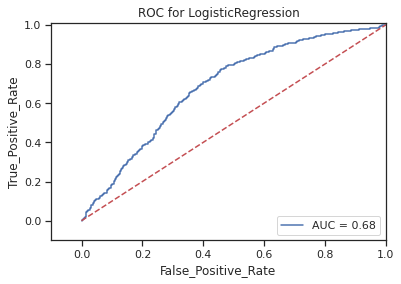

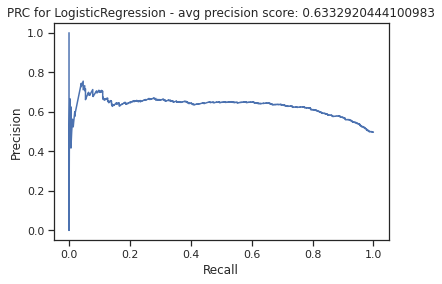

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: DataConversionWarning: A column-vector 

============================= KNearest =============================
Mean cross validation score: 0.6599062499999999
Mean precision score: 0.6554779391977354
Mean Recall score: 0.6525744974098189
Mean ROC-AUC score: 0.6570960892332451
Mean F1 score: 0.6538803445765542
******* Real test dataset metrics *******
Accuracy score for the real test set:
 0.638680659670165
confusion matrix for the real test set:
 [[636 372]
 [351 642]]
Classification report for the real test set:
               precision    recall  f1-score   support

           0       0.64      0.63      0.64      1008
           1       0.63      0.65      0.64       993

    accuracy                           0.64      2001
   macro avg       0.64      0.64      0.64      2001
weighted avg       0.64      0.64      0.64      2001



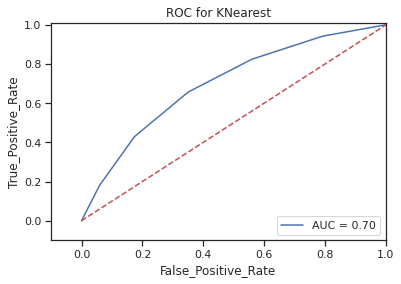

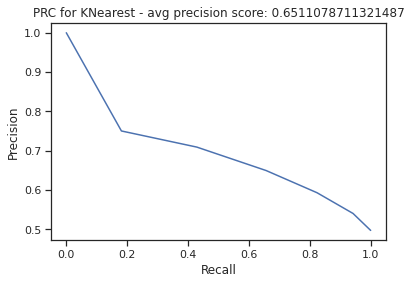

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

============================= Support Vector Classifier =============================
Mean cross validation score: 0.6573749999999999
Mean precision score: 0.6229916812349676
Mean Recall score: 0.7756823978581501
Mean ROC-AUC score: 0.6563394188017689
Mean F1 score: 0.6909509332662495
******* Real test dataset metrics *******
Accuracy score for the real test set:
 0.6421789105447276
confusion matrix for the real test set:
 [[543 465]
 [251 742]]
Classification report for the real test set:
               precision    recall  f1-score   support

           0       0.68      0.54      0.60      1008
           1       0.61      0.75      0.67       993

    accuracy                           0.64      2001
   macro avg       0.65      0.64      0.64      2001
weighted avg       0.65      0.64      0.64      2001

============================= DecisionTreeClassifier =============================
Mean cross validation score: 0.6201875
Mean precision score: 0.6167088663952187
Mean Recall sc

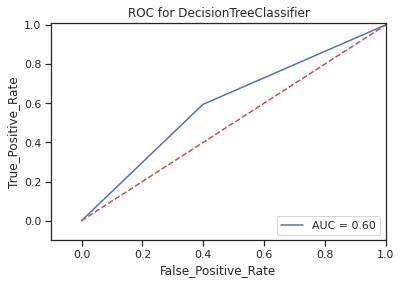

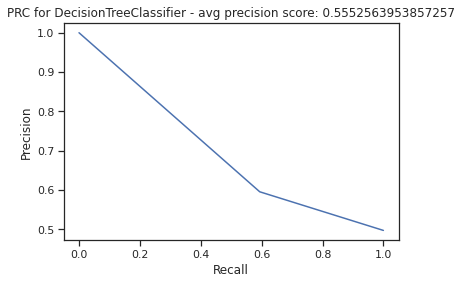

/usr/local/lib/python3.6/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = col

============================= Naive Bayes =============================
Mean cross validation score: 0.52896875
Mean precision score: 0.5110734569777139
Mean Recall score: 0.9599730684536538
Mean ROC-AUC score: 0.5271555923776523
Mean F1 score: 0.6670220074104156
******* Real test dataset metrics *******
Accuracy score for the real test set:
 0.5272363818090955
confusion matrix for the real test set:
 [[110 898]
 [ 48 945]]
Classification report for the real test set:
               precision    recall  f1-score   support

           0       0.70      0.11      0.19      1008
           1       0.51      0.95      0.67       993

    accuracy                           0.53      2001
   macro avg       0.60      0.53      0.43      2001
weighted avg       0.61      0.53      0.43      2001



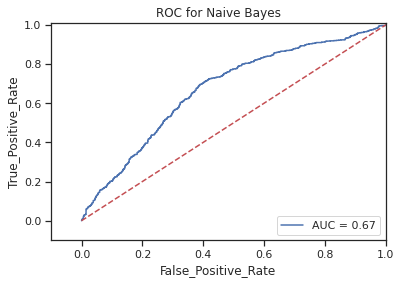

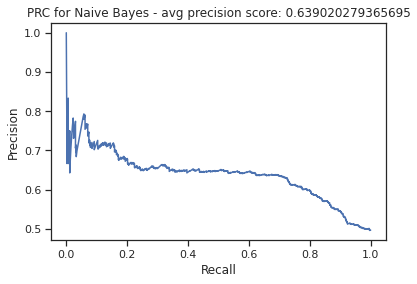

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: DataConversionWarning: A column-vector y wa

============================= Random forests =============================
Mean cross validation score: 0.6765000000000001
Mean precision score: 0.6761598808086864
Mean Recall score: 0.6749783755524927
Mean ROC-AUC score: 0.6779769888951834
Mean F1 score: 0.6755044261988881
******* Real test dataset metrics *******
Accuracy score for the real test set:
 0.6581709145427287
confusion matrix for the real test set:
 [[673 335]
 [349 644]]
Classification report for the real test set:
               precision    recall  f1-score   support

           0       0.66      0.67      0.66      1008
           1       0.66      0.65      0.65       993

    accuracy                           0.66      2001
   macro avg       0.66      0.66      0.66      2001
weighted avg       0.66      0.66      0.66      2001



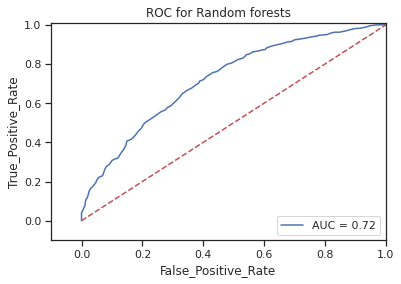

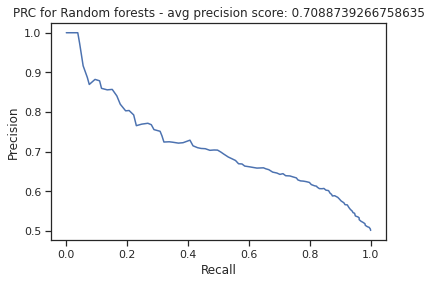

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

============================= XGBoost Classifier =============================
Mean cross validation score: 0.6897500000000001
Mean precision score: 0.6740648110424674
Mean Recall score: 0.7482464394911521
Mean ROC-AUC score: 0.6957475281160275
Mean F1 score: 0.7091713666139363
******* Real test dataset metrics *******
Accuracy score for the real test set:
 0.6806596701649176
confusion matrix for the real test set:
 [[652 356]
 [283 710]]
Classification report for the real test set:
               precision    recall  f1-score   support

           0       0.70      0.65      0.67      1008
           1       0.67      0.72      0.69       993

    accuracy                           0.68      2001
   macro avg       0.68      0.68      0.68      2001
weighted avg       0.68      0.68      0.68      2001



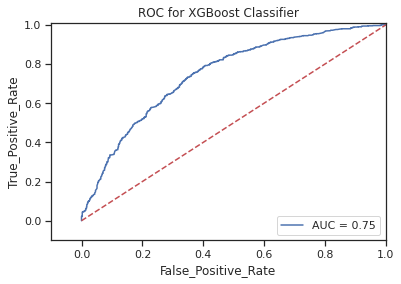

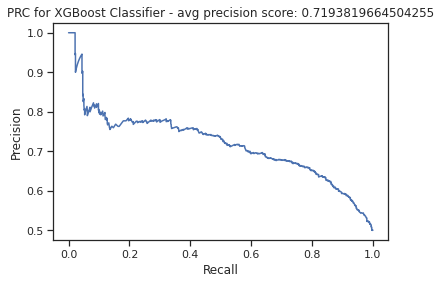

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
 

============================= GradientBoostingClassifier =============================
Mean cross validation score: 0.6921875
Mean precision score: 0.678012527295041
Mean Recall score: 0.7444709535351615
Mean ROC-AUC score: 0.6979559274249179
Mean F1 score: 0.7096342631555619
******* Real test dataset metrics *******
Accuracy score for the real test set:
 0.6806596701649176
confusion matrix for the real test set:
 [[657 351]
 [288 705]]
Classification report for the real test set:
               precision    recall  f1-score   support

           0       0.70      0.65      0.67      1008
           1       0.67      0.71      0.69       993

    accuracy                           0.68      2001
   macro avg       0.68      0.68      0.68      2001
weighted avg       0.68      0.68      0.68      2001



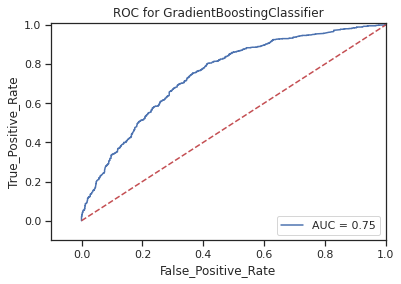

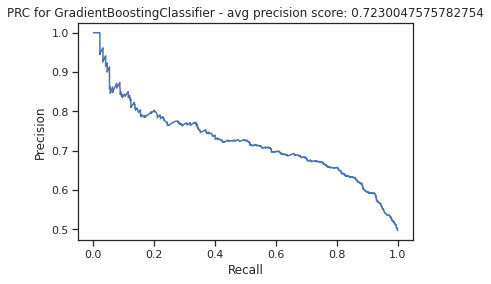

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:934: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:934: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:934: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:934: DataConversionWarning: A column-vector y was passed when a 1d

============================= MLP Classifier =============================
Mean cross validation score: 0.6885937499999999
Mean precision score: 0.6704181357520286
Mean Recall score: 0.7296063241607655
Mean ROC-AUC score: 0.6880399113059118
Mean F1 score: 0.6987291892437003
******* Real test dataset metrics *******
Accuracy score for the real test set:
 0.6681659170414792
confusion matrix for the real test set:
 [[627 381]
 [283 710]]
Classification report for the real test set:
               precision    recall  f1-score   support

           0       0.69      0.62      0.65      1008
           1       0.65      0.72      0.68       993

    accuracy                           0.67      2001
   macro avg       0.67      0.67      0.67      2001
weighted avg       0.67      0.67      0.67      2001



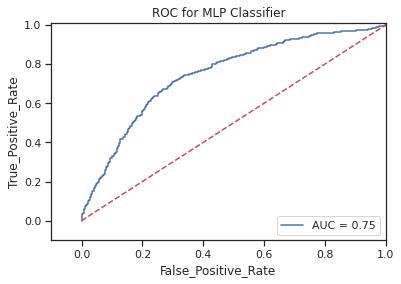

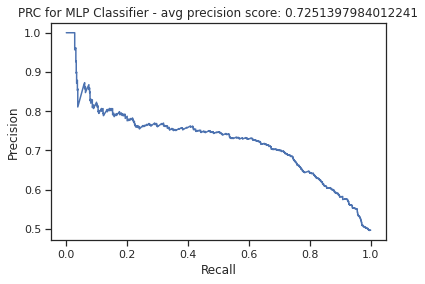

In [0]:
run_models()

#*Make Prediction*

In [0]:
def get_df(text, btc, fc, htc, mtc, pof):
  data = {'text': [text]}
  test_data = pd.DataFrame(data)

	# Add the cleaned columns
  test_data['text'] = test_data["text"].map(lambda x: text_cleaning(x))
  test_data['num_contraction'] = test_data['text'].apply(num_contraction)
  test_data['total_stop_words'] = test_data['text'].apply(total_stop_words)
  test_data['stop_words'] = test_data['text'].apply(stop_words)
  test_data['pos'] = test_data['text'].apply(part_of_speech)
  test_data['senti'] = test_data['text'].apply(sentiment)
  test_data['barelytruecounts'] = btc
  test_data['falsecounts'] = fc		
  test_data['halftruecounts']= htc
  test_data['mostlytrueocunts'] = mtc 
  test_data['pantsonfirecounts'] = pof	
  headlinetopiccolnames = ['topic_number','lda_score','topic_top_words']
  test_data = update_lda_results_to_dataset(test_data, headlinetopiccolnames,'text', dictionary_headline, lda_model_headline, lda_headline_topic_words)
  test_data = test_data.drop(['text','pos','topic_top_words'], axis=1)

  return test_data

Saving the model

In [0]:
import pickle

classifier = classifiers['Random forests']
writing_style_model_path = '/content/drive/Shared drives/SheCodes/MLSpring2020/shecodes_employee_attrition/Alternus Vera Sprint 4/Models/writingStyle.pickle'

pickle.dump(classifier, open(writing_style_model_path, 'wb'))

In [0]:
writing_style_model = pickle.load(open(writing_style_model_path, "rb"))

In [0]:
# Function to predict the results
def predict(text, btc, fc, htc, mtc, pof):
  test_data = get_df(text, btc, fc, htc, mtc, pof)
  return classifiers['Random forests'].predict(test_data), classifiers['Random forests'].predict_proba(test_data)

In [0]:
# Function to generate score
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

le.fit([0,1])

def Shecodes_getWritingStyleScore(text,btc, fc, htc, mtc, pof):

  pred, prediction_prob = predict(text, btc, fc, htc, mtc, pof)
  print ("Predicted classification: {}".format(le.inverse_transform(pred)[0]))
  print ("Prediction probabilities {} : {}".format(le.inverse_transform([0,1]), prediction_prob))

  truth_score = (prediction_prob[0][0] * 0.5)
  fake_score = (prediction_prob[0][1] * 0.5)
  if fake_score in np.arange(0.0,0.50, 0.50):
      print("This news is Mostly True.")
  elif fake_score == 0.50:
      print("This mews is Half True.")
  elif fake_score in np.arange(0.50,0.76,0.26):
      print("This news is Barely True")
  elif fake_score in np.arange(0.76,1.0,0.24):
      print("Pants on fire!!!")
  elif fake_score == 1.0:
      print("This news is False")
  elif fake_score == 0.0:
      print("This news is True")  
  if (truth_score > fake_score):
    if (truth_score > 1):
      truth_score = 1  
    print ("Fakeness Score: {}".format(1 - truth_score)) 
    return 1 - truth_score
  else:
    if (fake_score > 1):
      fake_score = 1
    print ("Fakeness Score: {}".format(fake_score))
  return fake_score



#Test the model

In [0]:
writing_score = Shecodes_getWritingStyleScore("The advisers sought to turn the low unemployment rate into a selling point to African-American voters, claiming they had more opportunities for jobs with higher wages.", 0 ,0 ,1,3,2)
print (writing_score)

Predicted classification: 1
Prediction probabilities [0 1] : [[0.44 0.56]]
0.28
Fakeness Score: 0.28
0.28


In above result we can see that the news is 28% fake news. 

#Compare and Analyze

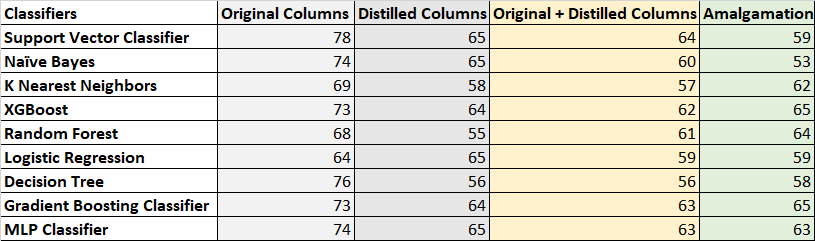

The above table shows the accuracy scores generated by the model using classifiers in different kind of datasets. I tried running the factor on original columns of the Liar Liar datasets, Distilled columns like LDA score, Sentiment Score, number of word contractions, stopwords, total stop words, etc. We also tried running the model on original and distilled columns and got 64% of highest accuracy on Liar Liar dataset. Finally, I ran the model on the amalgamated dataset of Kagle Fake News dataset, Liar Liar dataset and Politifact dataset. The accuracy of the model is within the range of 53% to 65%.